# Introduction

The provided dataset is from U.S. Census Service on the Boston housing area. Our question is how much error would occur with linear regression?

## Loading the data

We first load the data. Since the data is represented as a .data file, we must manipulate the data to fit in a pandas DataFrame.

In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression 
%matplotlib inline
import matplotlib.pyplot as plt

f = open("Dataset.data","r")
rawData = [x for x in f.read().split() if x != '\\'] # This is due to the w f.close()
# Now create a DataFrame with this data
rawData = np.array(rawData).reshape(506,14)
d = pd.DataFrame(rawData,columns=['CRIM','ZN','NDUS','CHAS','NOX',
                                 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
                                 'PTRATIO', 'B', 'LSTAT','MEDV'])
d.head()

,CRIM,ZN,NDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
1,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
2,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
3,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
4,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20


Here’s the rundown of each column’s meaning:

* CRIM \- per capita crime rate by town
* ZN \- proportion of residential land zoned for lots
* NDUS \- proportion of non-retail business acres per town
* CHAS \- Charles River dummy variable (1 if tract bounds river; 0 otherwise) • NOX - nitric oxides concentration (parts per 10 million)
* RM \- average number of rooms per dwelling
* AGE \- proportion of owner-occupied units built prior to 1940
* DIS \- weighted distances to five Boston employment centres
* RAD \- index of accessibility to radial highways
* TAX \- full-value property-tax rate per \$10,000
* PTRATIO \- pupil-teacher ratio by town
* B \- 1000(Bk - 0.63)ˆ2 where Bk is the proportion of blacks by town
* LSTAT \- percentage of lower status of the population
* MEDV \- Median value of owner-occupied homes in $1000’s

We’ll create a function to test the error amount between cross validation and test cases. The samples will range from 100 to 506

In [2]:
def linRegFeature(theFeature, myMin, myMax): 
    res = {'cross':[], 'test':[]}
    featuresToTest = []
    for feature in d:
        if feature != theFeature: 
            featuresToTest.append(feature)
    for i in range(myMin,myMax+1):
        trAmount = int(i * 0.6)
        teAmount = int(i * 0.2)
        trainD = d[:trAmount]
        crossD = d[trAmount:trAmount+teAmount] 
        testD = d[len(crossD):len(crossD)+teAmount]
                
        trainX = trainD[featuresToTest]
        trainY = trainD[theFeature]
                
        # Now train the actual data
        regr = LinearRegression()
        regr.fit(trainX, trainY)
            
        crossX = crossD[featuresToTest]
        crossY = pd.to_numeric(crossD[theFeature])
            
        predY = regr.predict(crossX)
        res['cross'].append(np.mean((crossY - predY) ** 2) )
            
        testX = testD[featuresToTest]
        testY = pd.to_numeric(testD[theFeature])
            
        predY = regr.predict(testX)
        res['test'].append(np.mean((testY - predY) ** 2) )
    results = pd.DataFrame(res, index=range(myMin,myMax+1))
    results.plot()

## Training the Model for per Capita Crime Rate

We’ll now attempt to train a model to determine the difference of error for per capita crime rate.

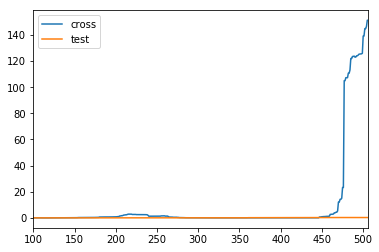

In [3]:
linRegFeature('CRIM', 100, 506)

## Training the Model for Residential Land Zoned

We’ll now attempt to train a model to determine the difference of error for residential land zoned.

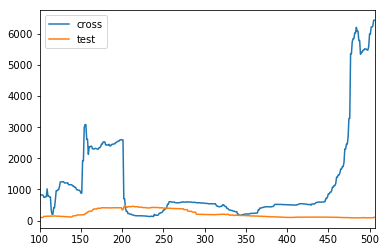

In [4]:
linRegFeature('ZN', 100, 506)

## Training the Model for Non-Retail Business Acres

We’ll now attempt to train a model to determine the difference of error for non-retail business acres.

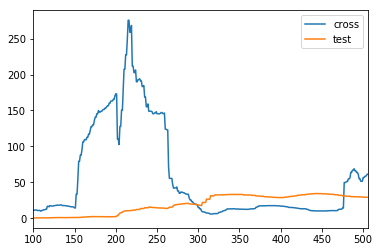

In [5]:
linRegFeature('NDUS', 100, 506)

## Training the Model for Charles River dummy variable

We’ll now attempt to train a model to determine the difference of error for Charles River dummy variable.

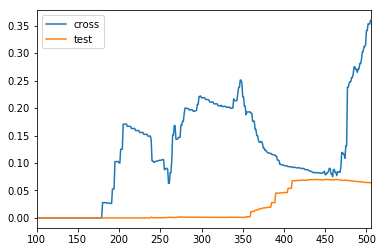

In [6]:
linRegFeature('CHAS', 100, 506)

## Training the Model for Nitric Oxide Concentration

We’ll now attempt to train a model to determine the difference of error for nitric oxides concen- tration.

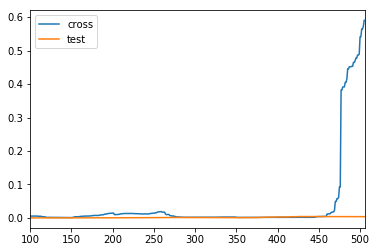

In [7]:
linRegFeature('NOX', 100, 506)

## Training the Model for Average Number of Rooms

We’ll now attempt to train a model to determine the difference of error for average number of rooms.

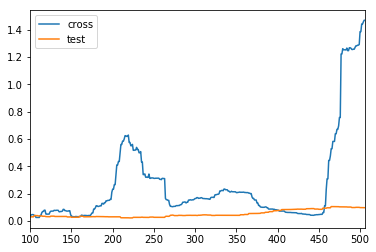

In [8]:
linRegFeature('RM', 100, 506)

## Training the Model for Owner-Occupied Units

We’ll now attempt to train a model to determine the difference of error for owner-occupied units.

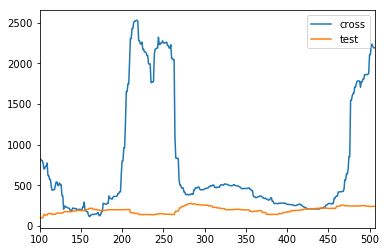

In [9]:
linRegFeature('AGE', 100, 506)

## Training the Model for Index of Weighted Distances to five Boston Employment Centres

We’ll now attempt to train a model to determine the difference of error for weighted distances to five Boston employment centres.

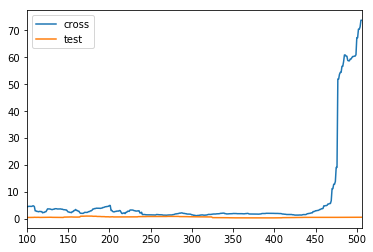

In [10]:
linRegFeature('DIS', 100, 506)

## Training the Model for Index of Accessibility to Radial Highways

We’ll now attempt to train a model to determine the difference of error for index of accessibility to radial highways.

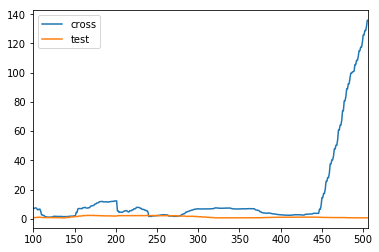

In [11]:
linRegFeature('RAD', 100, 506)

## Training the Model for Property-Tax rate

We’ll now attempt to train a model to determine the difference of error for property-tax rate.

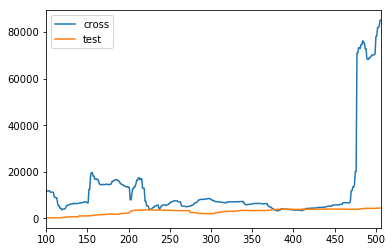

In [12]:
linRegFeature('TAX', 100, 506)

## Training the Model for Pupil-Teacher Ratio

We’ll now attempt to train a model to determine the difference of error for pupil-teacher ratio.

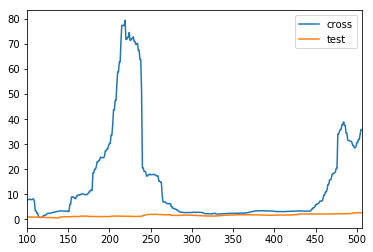

In [13]:
linRegFeature('PTRATIO', 100, 506)

## Training the Model for Blacks by Town

We’ll now attempt to train a model to determine the difference of error for blacks by town.

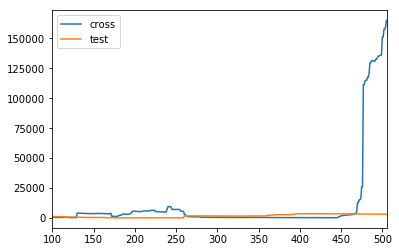

In [14]:
linRegFeature('B', 100, 506)

## Training the Model for Lower Status

We’ll now attempt to train a model to determine the difference of error for lower status.

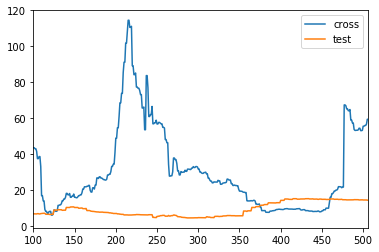

In [15]:
linRegFeature('LSTAT', 100, 506)

## Training the Model for Median House Pricing

We’ll now attempt to train a model to determine the difference of error for median house pricing.

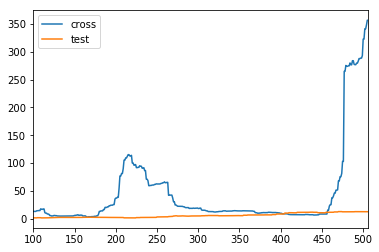

In [16]:
linRegFeature('MEDV', 100, 506)